Archive:  GAimage.zip
  inflating: GAimage.py              


The type of mnist_ds: <class 'mindspore.dataset.engine.datasets_vision.MnistDataset'>
Number of pictures contained in the mnist_ds： 60000
The item of mnist_ds: dict_keys(['image', 'label'])
Tensor of image in item: (28, 28, 1)
The label of item: 4


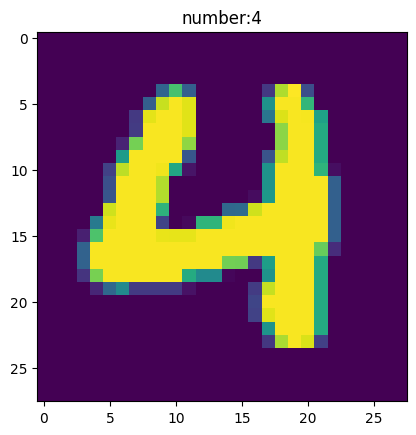

In [1]:
from mindspore import context
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import mindspore.dataset as ds

context.set_context(mode=context.GRAPH_MODE, device_target='GPU') # Windows version, set to use CPU for graph calculation
train_data_path = "./MNIST_Data/train"
test_data_path = "./MNIST_Data/test"
mnist_ds = ds.MnistDataset(train_data_path) # Load training dataset
print('The type of mnist_ds:', type(mnist_ds))
print("Number of pictures contained in the mnist_ds：",mnist_ds.get_dataset_size()) # 60000 pictures in total

dic_ds = mnist_ds.create_dict_iterator() # Convert dataset to dictionary type
item = dic_ds.__next__()
img = item["image"].asnumpy()
label = item["label"].asnumpy()

print("The item of mnist_ds:", item.keys()) # Take a single data to view the data structure, including two keys, image and label
print("Tensor of image in item:", img.shape) # View the tensor of image (28,28,1)
print("The label of item:", label)

plt.imshow(np.squeeze(img))
plt.title("number:%s"% item["label"])
plt.show()


In [44]:
# Data processing module
import mindspore.dataset.vision.c_transforms as CV
import mindspore.dataset.transforms.c_transforms as C
from mindspore.dataset.vision import Inter
from mindspore.common import dtype as mstype


def create_dataset(data_path, batch_size=32, repeat_size=1,
                   num_parallel_workers=1):

    # define dataset
    mnist_ds = ds.MnistDataset(data_path)

    # Define some parameters needed for data enhancement and rough justification
    resize_height, resize_width = 32, 32
    rescale = 1.0 / 255.0
    shift = 0.0
    rescale_nml = 1 / 0.3081
    shift_nml = -1 * 0.1307 / 0.3081

    # According to the parameters, generate the corresponding data enhancement method
    resize_op = CV.Resize((resize_height, resize_width), interpolation=Inter.LINEAR)  # Resize images to (32, 32) by bilinear interpolation
    rescale_nml_op = CV.Rescale(rescale_nml, shift_nml) # normalize images
    rescale_op = CV.Rescale(rescale, shift) # rescale images
    hwc2chw_op = CV.HWC2CHW() # change shape from (height, width, channel) to (channel, height, width) to fit network.
    type_cast_op = C.TypeCast(mstype.int32) # change data type of label to int32 to fit network

    # Using map () to apply operations to a dataset
    mnist_ds = mnist_ds.map(input_columns="label", operations=type_cast_op, num_parallel_workers=num_parallel_workers)
    mnist_ds = mnist_ds.map(input_columns="image", operations=resize_op, num_parallel_workers=num_parallel_workers)
    mnist_ds = mnist_ds.map(input_columns="image", operations=rescale_op, num_parallel_workers=num_parallel_workers)
    mnist_ds = mnist_ds.map(input_columns="image", operations=rescale_nml_op, num_parallel_workers=num_parallel_workers)
    mnist_ds = mnist_ds.map(input_columns="image", operations=hwc2chw_op, num_parallel_workers=num_parallel_workers)
    # Process the generated dataset
    buffer_size = 10000
    mnist_ds = mnist_ds.shuffle(buffer_size=buffer_size)  # 10000 as in LeNet train script
    mnist_ds = mnist_ds.batch(batch_size, drop_remainder=True)
    mnist_ds = mnist_ds.repeat(repeat_size)

    return mnist_ds


'''def create_dataset(data_path, batch_size=64, repeat_size=1,
                   num_parallel_workers=1):
    """ create dataset for train or test
    Args:
        data_path: Data path
        batch_size: The number of data records in each group
        repeat_size: The number of replicated data records
        num_parallel_workers: The number of parallel workers
    """
    # define dataset
    mnist_ds = ds.MnistDataset(data_path)

    # Define some parameters needed for data enhancement and rough justification
    resize_height, resize_width = 32, 32
    rescale = 1.0 / 255.0
    shift = 0.0
    rescale_nml = 1 / 0.3081
    shift_nml = -1 * 0.1307 / 0.3081

    # According to the parameters, generate the corresponding data enhancement method
    resize_op = CV.Resize((resize_height, resize_width), interpolation=Inter.LINEAR)  # Resize images to (32, 32) by bilinear interpolation
    rescale_nml_op = CV.Rescale(rescale_nml, shift_nml) # normalize images
    rescale_op = CV.Rescale(rescale, shift) # rescale images
    hwc2chw_op = CV.HWC2CHW() # change shape from (height, width, channel) to (channel, height, width) to fit network.
    type_cast_op = C.TypeCast(mstype.int32) # change data type of label to int32 to fit network

    # Using map () to apply operations to a dataset
    mnist_ds = mnist_ds.map(input_columns="label", operations=type_cast_op, num_parallel_workers=num_parallel_workers)
    mnist_ds = mnist_ds.map(input_columns="image", operations=resize_op, num_parallel_workers=num_parallel_workers)
    mnist_ds = mnist_ds.map(input_columns="image", operations=rescale_op, num_parallel_workers=num_parallel_workers)
    mnist_ds = mnist_ds.map(input_columns="image", operations=rescale_nml_op, num_parallel_workers=num_parallel_workers)
    mnist_ds = mnist_ds.map(input_columns="image", operations=hwc2chw_op, num_parallel_workers=num_parallel_workers)
    # Process the generated dataset
    buffer_size = 10000
    mnist_ds = mnist_ds.shuffle(buffer_size=buffer_size)  # 10000 as in LeNet train script
    mnist_ds = mnist_ds.batch(batch_size, drop_remainder=True)
    mnist_ds = mnist_ds.repeat(repeat_size)

    return mnist_ds
    '''

'def create_dataset(data_path, batch_size=64, repeat_size=1,\n                   num_parallel_workers=1):\n    """ create dataset for train or test\n    Args:\n        data_path: Data path\n        batch_size: The number of data records in each group\n        repeat_size: The number of replicated data records\n        num_parallel_workers: The number of parallel workers\n    """\n    # define dataset\n    mnist_ds = ds.MnistDataset(data_path)\n\n    # Define some parameters needed for data enhancement and rough justification\n    resize_height, resize_width = 32, 32\n    rescale = 1.0 / 255.0\n    shift = 0.0\n    rescale_nml = 1 / 0.3081\n    shift_nml = -1 * 0.1307 / 0.3081\n\n    # According to the parameters, generate the corresponding data enhancement method\n    resize_op = CV.Resize((resize_height, resize_width), interpolation=Inter.LINEAR)  # Resize images to (32, 32) by bilinear interpolation\n    rescale_nml_op = CV.Rescale(rescale_nml, shift_nml) # normalize images\n    resc

Number of groups in the dataset: 1875
dict_keys(['image', 'label'])
Tensor of ima, images.shape
labels: [8 0 4 5 2 0 3 3 0 8 5 7 1 3 9 1 8 2 9 3 9 0 7 4 1 4 8 8 1 3 8 8]


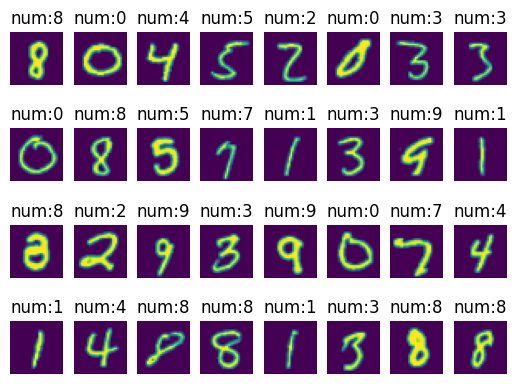

In [45]:
datas = create_dataset(train_data_path,batch_size=32) # Process the train dataset
print('Number of groups in the dataset:', datas.get_dataset_size()) # Number of query dataset groups

data = datas.create_dict_iterator().__next__() # Take a set of datasets
print(data.keys())
images = data["image"].asnumpy() # Take out the image data in this dataset
labels = data["label"].asnumpy() # Take out the label (subscript) of this data set
print('Tensor of ima, images.shape') # Query the tensor of images in each dataset (32,1,32,32)
print('labels:', labels)

count = 1
for i in images:
    plt.subplot(4, 8, count) 
    plt.imshow(np.squeeze(i))
    plt.title('num:%s'%labels[count-1])
    plt.xticks([])
    count += 1
    plt.axis("off")
    
plt.show() # Print a total of 32 pictures in the group


In [46]:
import mindspore.nn as nn
from mindspore.common.initializer import TruncatedNormal




In [47]:

class LeNet5(nn.Cell):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, stride=1, pad_mode='valid')
        self.conv2 = nn.Conv2d(6, 16, 5, stride=1, pad_mode='valid')
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Dense(400, 120)
        self.fc2 = nn.Dense(120, 84)
        self.fc3 = nn.Dense(84, 10)
        self.dropout = nn.Dropout(keep_prob=0.5)
    def construct(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x



In [48]:
import mindspore.nn as nn
import mindspore.ops.operations as P

# 定义残差块
class ResBlock(nn.Cell):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=0,pad_mode='pad', has_bias=Fals)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=0, pad_mode='pad', has_bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.stride = stride
        self.add = P.TensorAdd()

        if in_channels != out_channels or stride != 1:
            self.conv3 = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, has_bias=False)
            self.bn3 = nn.BatchNorm2d(out_channels)
        else:
            self.conv3 = None

    def construct(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.conv3 is not None:
            identity = self.conv3(identity)
            identity = self.bn3(identity)

        out = self.add(out, identity)
        out = self.relu(out)

        return out

# 定义 ResNet50 模型
class ResNet50(nn.Cell):
    def __init__(self, num_classes):
        super(ResNet50, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, has_bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, pad_mode='same')
        
        self.stage1 = nn.SequentialCell([ResBlock(64, 256, stride=1) for _ in range(3)])
        self.stage2 = nn.SequentialCell([ResBlock(64, 128) if x == 0 else ResBlock(128, 128) for x in range(3)])
        self.stage3 = nn.SequentialCell([ResBlock(128, 256) if x == 0 else ResBlock(256, 256) for x in range(4)])
        self.stage4 = nn.SequentialCell([ResBlock(256, 512) if x == 0 else ResBlock(512, 512) for x in range(6)])
        self.stage5 = nn.SequentialCell([ResBlock(512, 1024) if x == 0 else ResBlock(1024, 1024) for x in range(3)])
        
        self.avgpool = nn.AvgPool2d(kernel_size=7, stride=1)
        self.flatten = nn.Flatten()
        self.fc = nn.Dense(1024, num_classes)

    def construct(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        x = self.stage1(x)
        x = self.stage2(x)
        x = self.stage3(x)
        x = self.stage4(x)
        x = self.stage5(x)
        
        x = self.avgpool(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x


In [49]:
network = LeNet5()
print(network)


LeNet5<
  (conv1): Conv2d<input_channels=1, output_channels=6, kernel_size=(5, 5), stride=(1, 1), pad_mode=valid, padding=0, dilation=(1, 1), group=1, has_bias=False, weight_init=normal, bias_init=zeros, format=NCHW>
  (conv2): Conv2d<input_channels=6, output_channels=16, kernel_size=(5, 5), stride=(1, 1), pad_mode=valid, padding=0, dilation=(1, 1), group=1, has_bias=False, weight_init=normal, bias_init=zeros, format=NCHW>
  (relu): ReLU<>
  (pool): MaxPool2d<kernel_size=2, stride=2, pad_mode=VALID>
  (flatten): Flatten<>
  (fc1): Dense<input_channels=400, output_channels=120, has_bias=True>
  (fc2): Dense<input_channels=120, output_channels=84, has_bias=True>
  (fc3): Dense<input_channels=84, output_channels=10, has_bias=True>
  (dropout): Dropout<keep_prob=0.5>
  >


In [50]:
param = network.trainable_params()
param


[Parameter (name=conv1.weight, shape=(6, 1, 5, 5), dtype=Float32, requires_grad=True),
 Parameter (name=conv2.weight, shape=(16, 6, 5, 5), dtype=Float32, requires_grad=True),
 Parameter (name=fc1.weight, shape=(120, 400), dtype=Float32, requires_grad=True),
 Parameter (name=fc1.bias, shape=(120,), dtype=Float32, requires_grad=True),
 Parameter (name=fc2.weight, shape=(84, 120), dtype=Float32, requires_grad=True),
 Parameter (name=fc2.bias, shape=(84,), dtype=Float32, requires_grad=True),
 Parameter (name=fc3.weight, shape=(10, 84), dtype=Float32, requires_grad=True),
 Parameter (name=fc3.bias, shape=(10,), dtype=Float32, requires_grad=True)]

In [51]:
import argparse
from mindspore import Tensor
from mindspore.train.serialization import load_checkpoint, load_param_into_net
from mindspore.train.callback import ModelCheckpoint, CheckpointConfig, LossMonitor,Callback
from mindspore.train import Model
from mindspore.nn.metrics import Accuracy,Precision,Recall,F1,ConfusionMatrix
from mindspore.nn.loss import SoftmaxCrossEntropyWithLogits

def train_net(model, epoch_size, mnist_path, repeat_size, ckpoint_cb, step_loss_info):
    """Define the training method."""
    print("============== Starting Training ==============")
    # load training dataset
    ds_train = create_dataset(os.path.join(mnist_path, "train"), 32, repeat_size)
    model.train(epoch_size, ds_train, callbacks=[ckpoint_cb, LossMonitor(), step_loss_info], dataset_sink_mode=True)


In [52]:
# Custom callback function
class Step_loss_info(Callback):
    def step_end(self, run_context):
        cb_params = run_context.original_args()
        # step_ Loss dictionary for saving loss value and step number information
        step_loss["loss_value"].append(str(cb_params.net_outputs))
        step_loss["step"].append(str(cb_params.cur_step_num))


============== Starting Training ==============
epoch: 1 step: 1875, loss is 2.3125574588775635
epoch: 2 step: 1875, loss is 0.03550067916512489
epoch: 3 step: 1875, loss is 0.023431124165654182
epoch: 4 step: 1875, loss is 0.033935531973838806
epoch: 5 step: 1875, loss is 0.009858177974820137
epoch: 6 step: 1875, loss is 0.0011166009353473783
epoch: 7 step: 1875, loss is 0.004470989108085632
epoch: 8 step: 1875, loss is 0.007147430442273617
epoch: 9 step: 1875, loss is 0.26099058985710144
epoch: 10 step: 1875, loss is 0.0004956668126396835


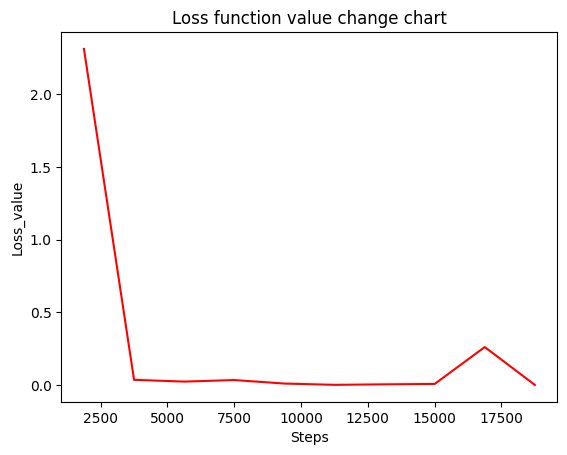

In [53]:
import os
from sklearn.metrics import classification_report

if os.name == "nt":
    os.system('del/f/s/q *.ckpt *.meta')# Clean up old run files before in Windows
else:
    os.system('rm -f *.ckpt *.meta *.pb')# Clean up old run files before in Linux

lr = 0.01 # learning rate
momentum = 0.9 #

# create the network
network = LeNet5()

# define the optimizer
net_opt = nn.Momentum(network.trainable_params(), lr, momentum)


# define the loss function
net_loss= SoftmaxCrossEntropyWithLogits(sparse=True,reduction='mean')





# define the model
model = Model(network, net_loss, net_opt, metrics={"Accuracy": Accuracy(),"Precision":Precision(),"Recall":Recall(),"F1":F1()} )
epoch_size = 10
mnist_path = "./MNIST_Data"

config_ck = CheckpointConfig(save_checkpoint_steps=125, keep_checkpoint_max=5)
# save the network model and parameters for subsequence fine-tuning

ckpoint_cb = ModelCheckpoint(prefix="checkpoint_lenet", directory='checkpoint',config=config_ck)
# group layers into an object with training and evaluation features
step_loss = {"step": [], "loss_value": []}
# step_ Loss dictionary for saving loss value and step number information
step_loss_info = Step_loss_info()
# save the steps and loss value
repeat_size = 1
train_net(model, epoch_size, mnist_path, repeat_size, ckpoint_cb, step_loss_info)



steps = step_loss["step"]
loss_value = step_loss["loss_value"]
steps = list(map(int, steps))
loss_value = list(map(float, loss_value))
plt.plot(steps, loss_value, color="red")
plt.xlabel("Steps")
plt.ylabel("Loss_value")
plt.title("Loss function value change chart")
plt.savefig("MSE训练.png")
plt.show()


In [56]:
import mindspore.nn as nn
import mindspore.nn.metrics as metrics

def test_net(network, model, mnist_path):
    """Define the evaluation method."""
    print("============== Starting Testing ==============")
    # load the saved model for evaluation
    param_dict = load_checkpoint("./checkpoint/checkpoint_lenet_76-8_1875.ckpt")
    # load parameter to the network
    load_param_into_net(network, param_dict)
    # load testing dataset
    ds_eval = create_dataset(os.path.join(mnist_path, "test"))
    acc = Accuracy()
    precision = Precision()
    recall = metrics.Recall()
    f1_score = metrics.F1()
    confusion_matrix = ConfusionMatrix(num_classes=10)
    for data, label in ds_eval.create_tuple_iterator():
        output = model.predict(Tensor(data))
        acc.update(output, Tensor(label))
        precision.update(output, Tensor(label))
        recall.update(output, Tensor(label))
        f1_score.update(output, Tensor(label))
        confusion_matrix.update(output,Tensor(label))
    print("Accuracy:", acc.eval().item())
    print("Precision:", sum(precision.eval())/len(precision.eval()))
    print("Recall:", sum(recall.eval())/len(recall.eval()))
    print("F1 Score:", sum(f1_score.eval())/len(f1_score.eval()))
    matrix = np.array(confusion_matrix.eval())
    np.set_printoptions(precision=2,suppress=True)
    print("Confusion Matrix:\n", matrix)
test_net(network, model, mnist_path)


============== Starting Testing ==============
Accuracy: 0.9894831730769231
Precision: 0.9895087376395211
Recall: 0.9894241529980483
F1 Score: 0.9894390976279357
Confusion Matrix:
 [[ 972.    1.    0.    0.    0.    0.    3.    2.    0.    0.]
 [   0. 1127.    1.    1.    2.    0.    0.    3.    0.    0.]
 [   0.    1. 1014.    3.    2.    0.    2.    7.    2.    1.]
 [   0.    0.    1. 1002.    0.    3.    0.    1.    2.    0.]
 [   0.    0.    0.    0.  981.    0.    0.    1.    0.    0.]
 [   1.    0.    0.    7.    0.  876.    2.    1.    0.    1.]
 [   4.    3.    0.    0.    3.    2.  945.    0.    1.    0.]
 [   0.    2.    2.    0.    1.    0.    0. 1020.    0.    1.]
 [   0.    0.    2.    1.    1.    2.    0.    1.  959.    3.]
 [   1.    2.    1.    2.   11.    3.    0.    3.    2.  983.]]
